In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
import itertools
import morphs
from morphs.data.derivative import f_map

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ddf = morphs.load.derivative_df()

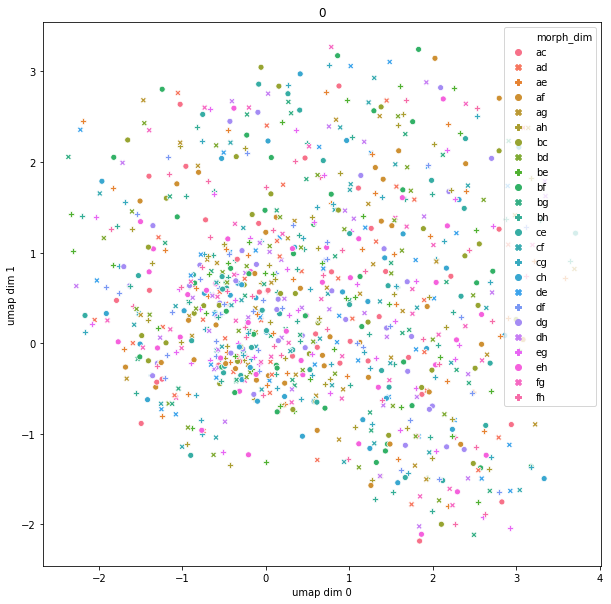

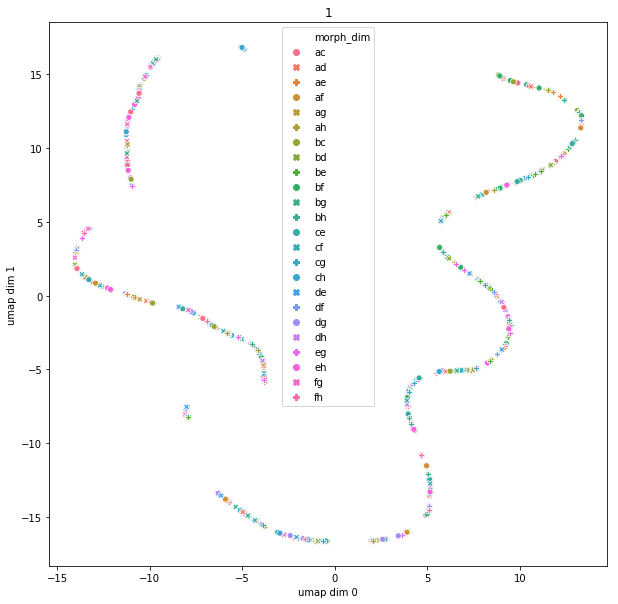

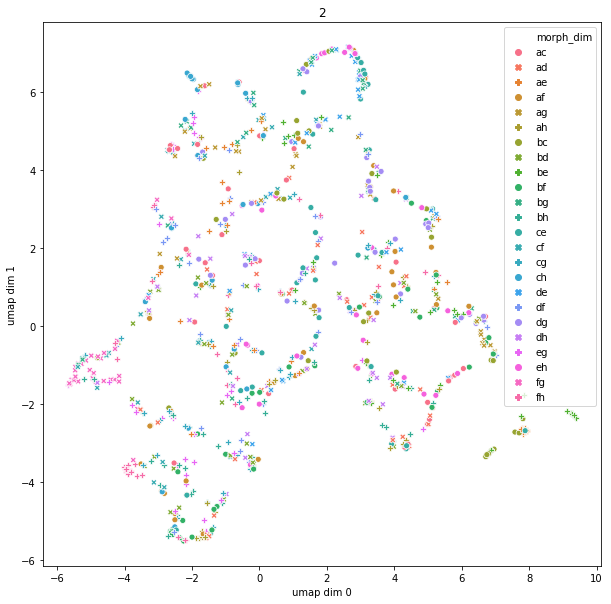

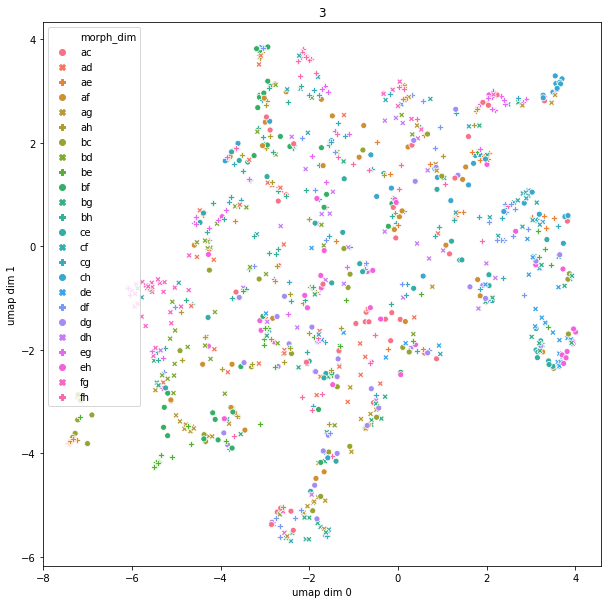

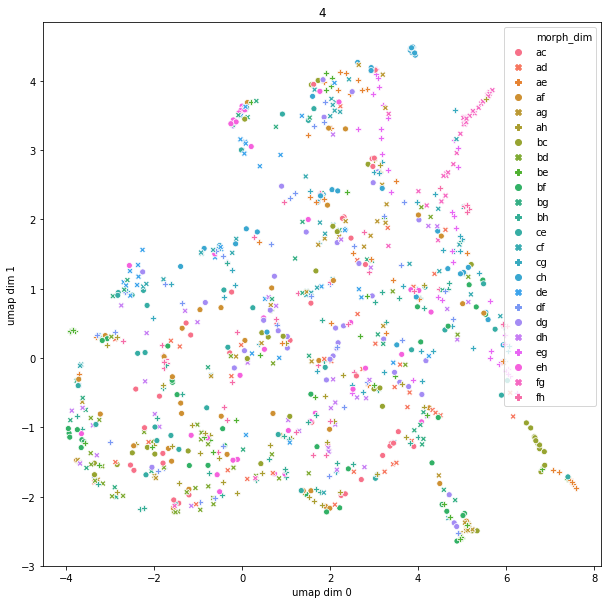

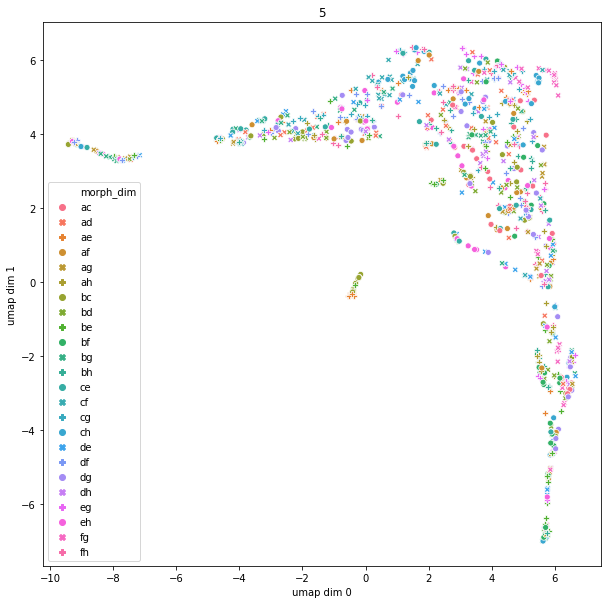

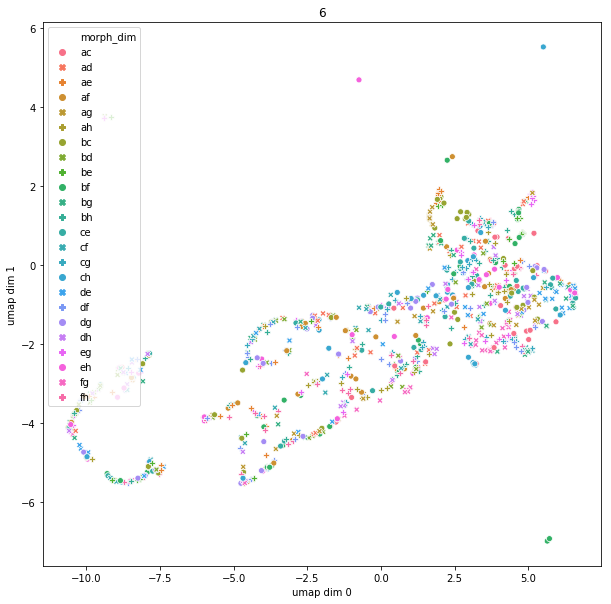

In [3]:
for order in range(7):
    ys = ddf[order][ddf[order].str[0].notna()].map(f_map)
    embedding = umap.UMAP().fit_transform(np.array([y for y in ys.values]))
    for i in range(2):
        ddf.loc[ddf[order].str[0].notna(), "umap dim %d" % (i)] = embedding[:, i]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        x="umap dim 0",
        y="umap dim 1",
        hue="morph_dim",
        style="morph_dim",
        #                     markers={morph_dim: "$\mathrm{%s}$" % (morph_dim) for morph_dim in ddf["morph_dim"].unique()}, s=300, edgecolors="face",
        markers={
            morph_dim: sym
            for morph_dim, sym in zip(
                ddf["morph_dim"].unique(), itertools.cycle(["o", "X", "P"])
            )
        },
        data=ddf,
    )
    plt.title(order)